In [1]:
import pandas as pd
data = [
    ['山田太郎',90,50],
    ['鈴木花子',80,70],
    ['高橋次郎',75,80],
    ['佐藤三郎',88,65]
]
score = pd.DataFrame(data, columns=['氏名','数学','英語'])
score
score.shape
len(score)
len(score.columns)
score['数学']
score.数学
score[score.数学 > 80]
score[score.数学 > 80][['氏名','数学']]

,氏名,数学
0,山田太郎,90
3,佐藤三郎,88


In [3]:
import pandas as pd
kokusei = pd.read_csv('data/02/c01.csv',encoding='shift_jis')
kokusei.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9.0,1920.0,NaN,55963053,28044185,27918868
1,01,北海道,大正,9.0,1920.0,NaN,2359183,1244322,1114861
2,02,青森県,大正,9.0,1920.0,NaN,756454,381293,375161
3,03,岩手県,大正,9.0,1920.0,NaN,845540,421069,424471
4,04,宮城県,大正,9.0,1920.0,NaN,961768,485309,476459


In [4]:
kokusei.tail()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
977,45,宮崎県,平成,27.0,2015.0,NaN,1104069,519242,584827
978,46,鹿児島県,平成,27.0,2015.0,NaN,1648177,773061,875116
979,47,沖縄県,平成,27.0,2015.0,NaN,1433566,704619,728947
980,1) 沖縄県は調査されなかったため，含まれていない。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,2) 長野県西筑摩群山口村と岐阜県中津川市の境界紛争地域人口（男39人，女34人）は全国に含...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
kokusei = kokusei.dropna(subset=['都道府県名'])
h27 = kokusei[kokusei['西暦（年）'] == 2015]
h27_pref = h27[~h27['都道府県コード'].isin(['00','0A','0B'])]
len(h27_pref)

47

In [7]:
h27_population = pd.Series(h27_pref['人口（総数）'],dtype='int')
pd.value_counts(h27_population // 1000000, sort = False)

5      3
1     21
2      7
7      2
6      1
13     1
9      1
0      9
3      1
8      1
Name: 人口（総数）, dtype: int64

In [9]:
import math
math.log2(47)+1

6.554588851677638

<AxesSubplot:>

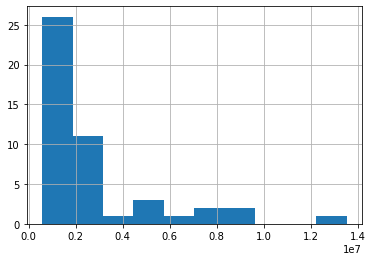

In [10]:
h27_population.hist()

<AxesSubplot:>

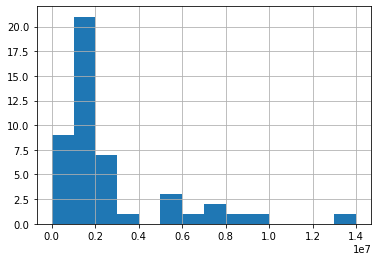

In [11]:
h27_population.hist(bins=list(range(0,15000000,1000000)))

In [12]:
h27_population.sum()

127094745

In [14]:
total = h27_population.sum()
total / len(h27_population)

2704143.510638298

In [15]:
h27_population.mean()

2704143.510638298

In [16]:
import numpy as np
np.average(h27_population)

2704143.510638298

In [19]:
h27_population.median()

1648177.0

In [20]:
import numpy as np
data = [58,67,61,80,55,72,69,74]
m = np.average(data)
np.sum([(i - m)**2 for i in data]) / len(data)

63.5

In [21]:
np.var(data)

63.5

In [22]:
import numpy as np
data = [58,67,61,80,55,72,69,74]
m = np.average(data)
np.sum([(i - m)**2 for i in data]) / (len(data) - 1)

72.57142857142857

In [23]:
np.sqrt(np.var(h27_population))

2699507.9674356566

In [24]:
np.std(h27_population)

2699507.9674356566

<BarContainer object of 3 artists>

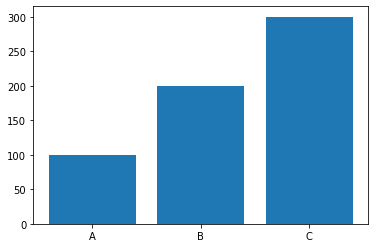

In [25]:
import matplotlib.pyplot as plt
plt.bar(
    ['A','B','C'],
    [100,200,300]
)

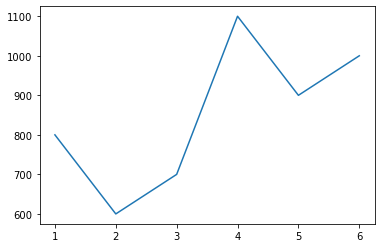

In [26]:
plt.plot(
    [1,2,3,4,5,6],
    [800,600,700,1100,900,1000]
)

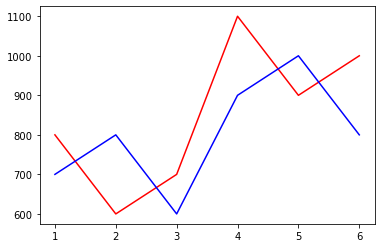

In [27]:
plt.plot(
    [1,2,3,4,5,6],
    [800,600,700,1100,900,1000],
    color='red'
)
plt.plot(
    [1,2,3,4,5,6],
    [700,800,600,900,1000,800],
    color='blue'
)

([<matplotlib.patches.Wedge at 0x7f6bafad0640>,
 [Text(1.0461621742897658, 0.33991867422268784, 'A'),
  Text(-0.33991877217145816, -1.046162142464278, 'O'),
  Text(-1.0461621265515308, 0.3399188211458419, 'B'),
  Text(-0.3399185517867208, 1.0461622140716127, 'AB')])

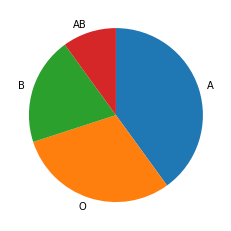

In [31]:
plt.pie(
    [40,30,20,10],
    labels=['A','O','B','AB'],
    startangle=90,
    counterclock=False
)

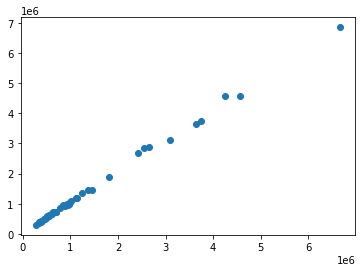

In [32]:
plt.scatter(
    pd.Series(h27_pref['人口（男）'],dtype='int'),
    pd.Series(h27_pref['人口（女）'],dtype='int'),
)

In [33]:
english = [80,60,90,70]
math = [50,70,40,80]
np.cov(english,math,bias=True)

array([[ 125., -150.],
       [-150.,  250.]])

In [34]:
np.cov(english,math)

array([[ 166.66666667, -200.        ],
       [-200.        ,  333.33333333]])

In [35]:
np.corrcoef(english,math)

array([[ 1.        , -0.84852814],
       [-0.84852814,  1.        ]])

In [36]:
score = pd.DataFrame([[80,50],[60,70],[90,40],[70,80]])
score.corr()

,0,1
0,1.000000,-0.848528
1,-0.848528,1.000000


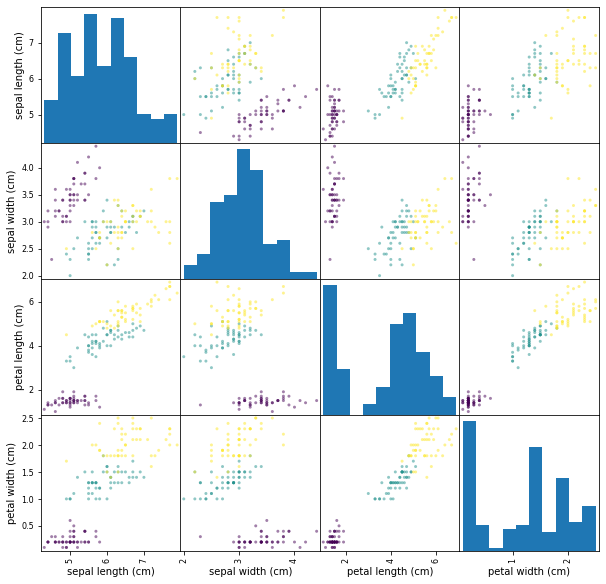

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(iris_df,figsize=(10,10),c=iris.target)
plt.show()

In [40]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [44]:
import pandas as pd

df = pd.DataFrame([
    ['男','A'],['女','B'],['男','A'],['男','AB'],
    ['女','O'],['男','A'],['女','A'],['女','AB'],
    ['男','A'],['女','A'],['女','O'],['男','B'],
],columns=['sex','blood_type'])
pd.crosstab(df['sex'],df['blood_type'])

blood_type,A,AB,B,O
sex,,,,
女,2,1,1,2
男,4,1,1,0


In [45]:
pd.crosstab(df['sex'],df['blood_type'],normalize=True)

blood_type,A,AB,B,O
sex,,,,
女,0.166667,0.083333,0.083333,0.166667
男,0.333333,0.083333,0.083333,0.000000


In [46]:
temperature = pd.read_csv('data/02/temperature.csv')
temperature.head()

,年月日,平均気温(℃)
0,2019/1/1,5.3
1,2019/1/2,6.2
2,2019/1/3,4.9
3,2019/1/4,5.1
4,2019/1/5,7.4


In [47]:
ma = np.convolve(temperature['平均気温(℃)'],[1/7] * 7)
ma

array([ 0.75714286,  1.64285714,  2.34285714,  3.07142857,  4.12857143,
        4.88571429,  5.65714286,  5.55714286,  5.31428571,  4.9       ,
        5.08571429,  4.68571429,  4.81428571,  4.84285714,  4.98571429,
        5.28571429,  5.94285714,  5.87142857,  6.15714286,  6.28571429,
        6.31428571,  6.22857143,  6.24285714,  6.18571429,  6.2       ,
        5.9       ,  5.54285714,  5.64285714,  5.78571429,  5.57142857,
        5.41428571,  5.14285714,  5.35714286,  5.91428571,  6.87142857,
        6.97142857,  7.04285714,  7.68571429,  7.97142857,  7.22857143,
        6.51428571,  5.05714286,  4.98571429,  4.91428571,  4.18571429,
        3.74285714,  4.6       ,  5.01428571,  5.75714286,  6.17142857,
        7.08571429,  7.91428571,  8.81428571,  9.11428571,  9.45714286,
        9.9       , 10.05714286,  9.5       ,  8.97142857,  8.9       ,
        9.1       ,  8.77142857,  8.2       ,  8.11428571,  8.55714286,
        8.78571429,  8.57142857,  8.52857143,  9.38571429, 10.1 

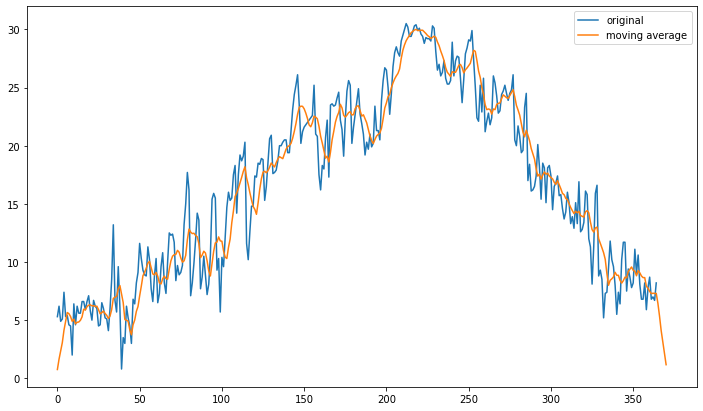

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.plot(temperature['平均気温(℃)'],label='original')
ax.plot(ma,label='moving average')
plt.legend()
plt.show()

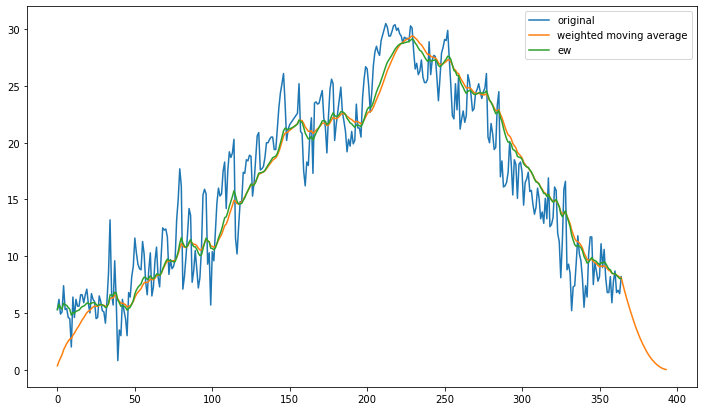

In [52]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

temperature = pd.read_csv('data/02/temperature.csv')
wma = np.convolve(
    temperature['平均気温(℃)'],
    [(30 - i) / (15 * 31) for i in range(30)]
)
ew = temperature['平均気温(℃)'].ewm(alpha=0.1).mean()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.plot(temperature['平均気温(℃)'],label='original')
ax.plot(wma,label='weighted moving average')
ax.plot(ew,label='ew')
plt.legend()
plt.show()

In [53]:
import numpy as np
dice = [1,2,3,4,5,6]
np.random.choice(dice,10)

array([2, 5, 6, 4, 2, 5, 2, 3, 2, 6])

(array([1., 0., 1., 0., 1., 0., 4., 0., 1., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

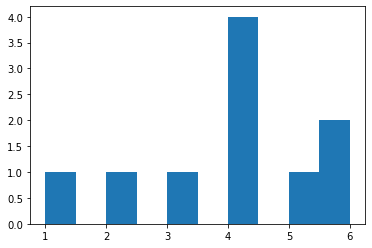

In [54]:
import matplotlib.pyplot as plt
np.random.seed(0)
rand = np.random.choice(dice,10)

plt.hist(rand)

In [55]:
np.random.normal(0,1,100)

array([ 0.95008842, -0.15135721, -0.10321885,  0.4105985 ,  0.14404357,
        1.45427351,  0.76103773,  0.12167502,  0.44386323,  0.33367433,
        1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
        0.6536186 ,  0.8644362 , -0.74216502,  2.26975462, -1.45436567,
        0.04575852, -0.18718385,  1.53277921,  1.46935877,  0.15494743,
        0.37816252, -0.88778575, -1.98079647, -0.34791215,  0.15634897,
        1.23029068,  1.20237985, -0.38732682, -0.30230275, -1.04855297,
       -1.42001794, -1.70627019,  1.9507754 , -0.50965218, -0.4380743 ,
       -1.25279536,  0.77749036, -1.61389785, -0.21274028, -0.89546656,
        0.3869025 , -0.51080514, -1.18063218, -0.02818223,  0.42833187,
        0.06651722,  0.3024719 , -0.63432209, -0.36274117, -0.67246045,
       -0.35955316, -0.81314628, -1.7262826 ,  0.17742614, -0.40178094,
       -1.63019835,  0.46278226, -0.90729836,  0.0519454 ,  0.72909056,
        0.12898291,  1.13940068, -1.23482582,  0.40234164, -0.68

In [56]:
data = [
    [100000, 10000, 0],
    [0.001, 0.009, 0.99]
]

In [63]:
sum([x_k * p_k for x_k, p_k in zip(data[0],data[1])])

190.0

In [67]:
dice = [
    [1, 2, 3, 4, 5, 6],
    [1/6,1/6,1/6,1/6,1/6,1/6]
]
mean = sum([x_k * p_k for x_k, p_k in zip(dice[0],dice[1])])
sum([(x_k - mean) ** 2 * p_k for [x_k, p_k] in zip(dice[0],dice[1])])

2.9166666666666665

In [70]:
def f(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    elif x < 2:
        return - x + 2
    else:
        return 0

from scipy import integrate

integrate.quad(f,0.5,1.5)

(0.75, 8.326672684688674e-15)

In [71]:
integrate.quad(f,-np.inf,np.inf)

(1.0000000000000009, 1.4494627720296194e-10)

In [74]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]


In [75]:
F(1.5) - F(0.5)

0.750000000001469

In [76]:
def calc(x):
    return x * f(x)
integrate.quad(calc, -np.inf, np.inf)

(1.0000000000000033, 7.011253799760198e-10)

In [78]:
ex = integrate.quad(calc, -np.inf, np.inf)[0]
def diff(x):
    return (x - ex) ** 2 * f(x)
integrate.quad(diff, -np.inf, np.inf)

(0.16666666666665894, 1.5226069571827594e-09)

In [79]:
from scipy.stats import norm
norm.cdf(1.64)

0.9494974165258963

In [81]:
norm.ppf(0.95)

1.6448536269514722

In [82]:
norm.pdf(1.64)

0.10396109532876424

In [86]:
import numpy as np
dice = [1,2,3,4,5,6]
population = np.random.choice(dice, 1000)
var = np.var(population)

from scipy.stats import norm

n=100

sample = np.random.choice(population,n)
m = sample.mean()
z = norm.ppf(0.95)
print(m - z * np.sqrt(var / n))
print(m + z * np.sqrt(var / n))

3.145107743033602
3.7148922569663982


In [87]:
import numpy as np
from scipy.stats import t

dice = [1,2,3,4,5,6]
n=20

sample = np.random.choice(dice,n)
m = np.mean(sample)
var = np.var(sample,ddof=1)
z = t.ppf(0.95, n - 1)
print(m - z * np.sqrt(var / n))
print(m + z * np.sqrt(var / n))

2.5638423437467033
4.136157656253297


In [88]:
from sklearn import linear_model
import numpy as np
dist = [
    [0]*190 + [1]*30,
    [0]*10 + [1]*20
]
sample = [
    np.random.choice(dist[0],20),
    np.random.choice(dist[1],20)
]
mail = [0,1]
reg = linear_model.BayesianRidge()
reg.fit(sample,mail)

BayesianRidge()

In [89]:
reg.predict([np.random.choice(dist[0],20)])

array([0.333334])

In [92]:
reg.predict([np.random.choice(dist[1],20)])

array([0.250001])

In [93]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [1]:
from scipy.stats import norm
[norm.ppf(0.025),norm.ppf(0.975)]

[-1.9599639845400545, 1.959963984540054]

In [3]:
import numpy as np
data = [29.2,29.8,31.2,32.1,28.8,30.1,30.9,29.4,30.7,31.2]
m = np.mean(data)
m

30.339999999999996

In [6]:
n = len(data)
z_value = (m - 30.0) / np.sqrt(1.5 / n)
z_value

0.8778762251403383

In [7]:
p_value = norm.pdf(z_value)
print(p_value)

0.27137005674469505


In [8]:
norm.cdf(z_value)

0.8099945536751224

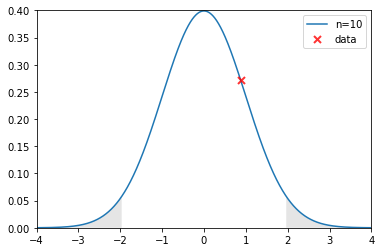

In [11]:
from matplotlib import pyplot as plt

x = np.linspace(-4,4,1000)
fig,ax = plt.subplots(1,1)

ax.plot(x, norm.pdf(x), linestyle='-', label='n='+str(n))

ax.plot(
    z_value,
    p_value, 
    'x', 
    color='red', 
    markersize=7,
    markeredgewidth=2,
    alpha=0.8,
    label='data'
    )

bottom, up = norm.interval(alpha=0.95,loc=0,scale=1)

plt.fill_between(
    x,
    norm.pdf(x),
    0,
    where=(x>=up)|(x<=bottom),
    facecolor='black',
    alpha=0.1
)

plt.xlim(-4,4)
plt.ylim(0,0.4)

plt.legend()
plt.show()

In [12]:
from scipy.stats import t

data = [25.1,23.9,25.2,24.6,24.3,24.8,23.8]
n = len(data)
[t.ppf(0.025,n-1),t.ppf(0.975,n-1)]

[-2.446911848791681, 2.4469118487916806]

In [13]:
m = np.mean(data)
var = np.var(data,ddof=1)
[m,var]

[24.528571428571432, 0.305714285714286]

In [14]:
t_value = (m - 25.0) / np.sqrt(var / n)
t_value

-2.2558335591813714

In [15]:
p_value = t.pdf(t_value, n - 1)
p_value

0.044599619186936175

In [17]:
t.cdf(t_value,n-1)

0.032459343192850335

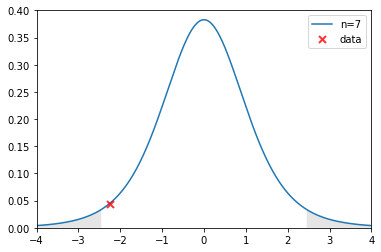

In [21]:
from matplotlib import pyplot as plt

x = np.linspace(-4,4,1000)
fig,ax = plt.subplots(1,1)

ax.plot(x, t.pdf(x, n-1),linestyle='-',label='n='+str(n))
ax.plot(t_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')

bottom,up = t.interval(0.95,n-1)
plt.fill_between(x,t.pdf(x,n-1),0,where=(x>=up)|(x<=bottom),facecolor='black',alpha=0.1)

plt.xlim(-4,4)
plt.ylim(0,0.4)

plt.legend()
plt.show()

In [23]:
from scipy import stats
data = [25.1,23.9,25.2,24.6,24.3,24.8,23.8]
stats.ttest_1samp(data,25.0)

Ttest_1sampResult(statistic=-2.2558335591813714, pvalue=0.06491868638570067)

In [25]:
from scipy.stats import t
data = [2,11,-2,2,4,4,4,8]
n=len(data)
t.ppf(0.95,n-1)

1.894578605061305

In [26]:
import numpy as np
m = np.mean(data)
var = np.var(data,ddof=1)
[m,var]


[4.125, 15.553571428571429]

In [27]:
t_value = m / np.sqrt(var / n)
t_value

2.9583794862804544

In [28]:
p_value = t.pdf(t_value,n-1)
p_value

0.015014104013924749

In [29]:
t.cdf(t_value,n-1)

0.9894231697839247

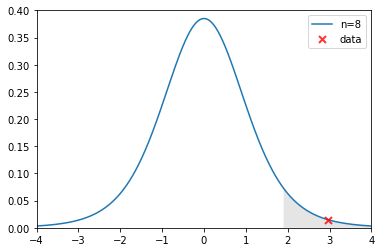

In [33]:
from matplotlib import pyplot as plt
x = np.linspace(-4,4,1000)
fig,ax = plt.subplots(1,1)
ax.plot(x,t.pdf(x,n-1),linestyle='-',label='n='+str(n))
ax.plot(t_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')
bottom,up = t.interval(0.90,n-1)
plt.fill_between(x,t.pdf(x,n-1),0,where=(x>=up),facecolor='black',alpha=0.1)
plt.xlim(-4,4)
plt.ylim(0,0.4)
plt.legend()
plt.show()

In [34]:
from scipy import stats
before = [80,75,63,88,91,58,67,72]
after = [82,86,61,90,95,62,71,80]
stats.ttest_rel(before,after)

Ttest_relResult(statistic=-2.9583794862804544, pvalue=0.02115366043215051)

In [35]:
from scipy.stats import t
x_1 = [15,18,17,18,19,17,16,20,19,14]
x_2 = [17,20,15,18,16,15,17,18]
n_1 = len(x_1)
n_2 = len(x_2)
t.ppf(0.95,n_1+n_2-2)

1.74588367627624

In [36]:
import numpy as np
m_1 = np.mean(x_1)
m_2 = np.mean(x_2)
s_1 = np.var(x_1,ddof=1)
s_2 = np.var(x_2,ddof=1)
[m_1,m_2,s_1,s_2]

[17.3, 17.0, 3.566666666666667, 2.857142857142857]

In [37]:
t_value = (m_1 - m_2) / np.sqrt(
    (1/n_1 + 1/n_2) * 
    ((n_1-1)*s_1 + (n_2 - 1)*s_2) /
    (n_1+n_2-2)
)
t_value

0.35048636347065965

In [39]:
p_value = t.pdf(t_value,n_1+n_2-2)
p_value

0.368040134751903

In [40]:
t.cdf(t_value,n_1+n_2-2)

0.6347272729659612

In [41]:
from scipy import stats
x_1 = [15,18,17,18,19,17,16,20,19,14]
x_2 = [17,20,15,18,16,15,17,18]
stats.ttest_ind(x_1,x_2)

Ttest_indResult(statistic=0.35048636347065965, pvalue=0.7305454540680775)

In [42]:
from scipy.stats import chi2
chi2.interval(0.90,9)

(3.325112843066815, 16.918977604620448)

In [43]:
import numpy as np
data = [31,42,29,51,45,42,37,48,39,50]
n = len(data)
chi_value = (n-1)*np.var(data,ddof=1) / 30
chi_value

17.013333333333332

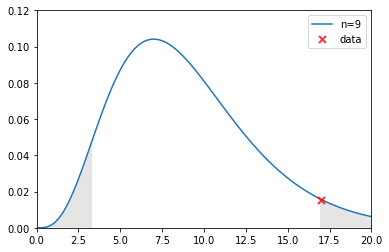

In [44]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2
p_value = chi2.pdf(chi_value,n-1)
x = np.linspace(0,20,1000)
fig,ax = plt.subplots(1,1)
ax.plot(x,chi2.pdf(x,n-1),linestyle='-',label='n='+str(n-1))
ax.plot(chi_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')
bottom,up = chi2.interval(0.90,n-1)
plt.fill_between(x,chi2.pdf(x,n-1),0,where=(x>=up)|(x<=bottom),facecolor='black',alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,0.12)
plt.legend()
plt.show()

In [45]:
from scipy.stats import f
a = [1400,1800,1100,2500,1300,2200,1900,1600]
b = [1500,1800,2200,1200,2000,1700]
n_1 = len(a)
n_2 = len(b)
[f.ppf(0.05,n_1-1,n_2-1),f.ppf(0.95,n_1-1,n_2-1)]

[0.25179256473579126, 4.875871695833996]

In [46]:
import numpy as np
s_a = np.var(a,ddof=1)
s_b = np.var(b,ddof=1)
f_value = s_a / s_b
f_value

1.7537593984962407

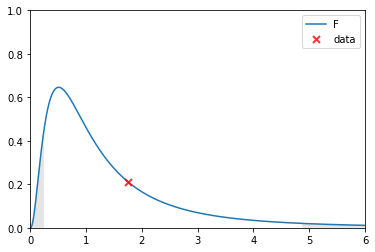

In [47]:
from matplotlib import pyplot as plt
import numpy as np
p_value = f.pdf(f_value,n_1-1,n_2-1)
x = np.linspace(0,6,1000)
fig,ax = plt.subplots(1,1)
ax.plot(x,f.pdf(x,n_1-1,n_2-1),linestyle='-',label='F')
ax.plot(f_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')
bottom,up = f.interval(0.90,n_1-1,n_2-1)
plt.fill_between(x,f.pdf(x,n_1-1,n_2-1),0,where=(x>=up)|(x<=bottom),facecolor='black',alpha=0.1)
plt.xlim(0,6)
plt.ylim(0,1)
plt.legend()
plt.show()

In [48]:
from scipy.stats import chi2
chi2.interval(0.95,1)

(0.0009820691171752583, 5.023886187314888)

In [49]:
import scipy.stats as st
data = [[5,7],[6,2]]
st.chi2_contingency(data,correction=False)

(2.1548821548821544,
 0.1421173468226269,
 1,
 array([[6.6, 5.4],
        [4.4, 3.6]]))

In [50]:
from scipy.stats import chi2
chi2.interval(0.90,6)

(1.6353828943279065, 12.591587243743977)

In [52]:
import numpy as np
data = [31,16,14,15,13,22,29]
m = np.mean(data)
chi_value = sum([(i-m) ** 2 / m for i in data])
chi_value

16.6

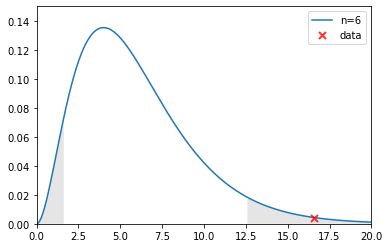

In [53]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2

n = len(data)
p_value = chi2.pdf(chi_value,n-1)

x = np.linspace(0,20,1000)
fig,ax = plt.subplots(1,1)
ax.plot(x,chi2.pdf(x,n-1),linestyle='-',label='n='+str(n-1))
ax.plot(chi_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')
bottom,up = chi2.interval(0.90,n-1)
plt.fill_between(x,chi2.pdf(x,n-1),0,where=(x>=up)|(x<=bottom),
                facecolor='black',alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,0.15)

plt.legend()
plt.show()

In [54]:
from scipy import stats
stats.chisquare([31,16,14,15,13,22,29])

Power_divergenceResult(statistic=16.6, pvalue=0.010871368601837355)

In [55]:
import numpy as np
data = [31,16,14,15,13,22,29]
expected = [30,15,15,15,15,20,40]
chi_value = sum([(i-j) ** 2 / j for i,j in zip(data,expected)])
chi_value

3.658333333333333

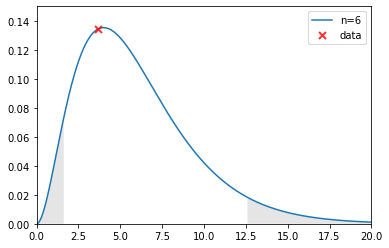

In [56]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2

n = len(data)
p_value = chi2.pdf(chi_value,n-1)

x = np.linspace(0,20,1000)
fig,ax = plt.subplots(1,1)
ax.plot(x,chi2.pdf(x,n-1),linestyle='-',label='n='+str(n-1))
ax.plot(chi_value,p_value,'x',color='red',markersize=7,markeredgewidth=2,alpha=0.8,label='data')
bottom,up = chi2.interval(0.90,n-1)
plt.fill_between(x,chi2.pdf(x,n-1),0,where=(x>=up)|(x<=bottom),
                facecolor='black',alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,0.15)

plt.legend()
plt.show()

In [59]:
from scipy import stats
stats.chisquare(
    f_obs=[31,16,14,15,13,22,29],
    f_exp=[30,15,15,15,15,20,40]
)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.07142857142857142

In [4]:
import numpy as np
x_1 = [15,18,17,18,19,17,16,20,19,14]
x_2 = [17,20,15,18,16,15,17,18]
s_1 = np.var(x_1,ddof=1)
s_2 = np.var(x_2,ddof=1)
n_1 = len(x_1)
n_2 = len(x_2)
nu = (s_1 / n_1 + s_2 / n_2) ** 2 / ((s_1 / n_1) ** 2 / (n_1 - 1) + (s_2 / n_2) ** 2 / (n_2 - 1))
nu

15.747366679841289

In [6]:
from scipy.stats import t
t.ppf(0.95,16)

1.74588367627624

In [7]:
from scipy.stats import t
t.ppf(0.95,16)
m_1 = np.mean(x_1)
m_2 = np.mean(x_2)
t = (m_1 - m_2) / np.sqrt(s_1 / n_1 + s_2 / n_2)
t

0.3550831677753239

In [8]:
from scipy import stats
x_1 = [15,18,17,18,19,17,16,20,19,14]
x_2 = [17,20,15,18,16,15,17,18]
stats.ttest_ind(x_1,x_2,equal_var = False)

Ttest_indResult(statistic=0.3550831677753239, pvalue=0.7272383789635237)

In [9]:
from scipy import stats
a = [36,40,38,42,45,43,39]
b = [42,40,48,35,37,38,43]
c = [51,58,56,52,49,50,51]
stats.f_oneway(a,b,c)

F_onewayResult(statistic=25.50361445783133, pvalue=5.589864152539778e-06)

In [12]:
from sklearn.linear_model import LinearRegression
x = [[15],[21],[22],[24],[25],[27],[28],[29],[30]]
y = [80,100,95,120,128,140,141,150,160]
model_lr = LinearRegression()
model_lr.fit(x,y)
print('y = %.03fx + %.03f' % (model_lr.coef_,model_lr.intercept_))

y = 5.572x + -13.054


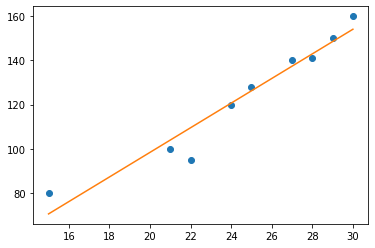

In [13]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(x,model_lr.predict(x),linestyle='solid')
plt.show()

In [14]:
model_lr.score(x,y)

0.9377073658062173

In [15]:
x = [15,21,22,24,25,27,28,29,30]
y = [80,100,95,120,128,140,141,150,160]
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
sum_xy = sum([(i - x_mean) * (j - y_mean) for (i,j) in zip(x,y)])
sum_xx = sum([(i - x_mean) ** 2 for i in x])
a = sum_xy / sum_xx
b = y_mean - a * x_mean
[a,b]

[5.572319201995013, -13.05361596009979]

In [21]:
def f(x):
    return 5.572 * x + -13.054
x = [15,21,22,24,25,27,28,29,30]
y = [80,100,95,120,128,140,141,150,160]
mean_y = sum(y)/len(y)
sum_data = sum([(i - mean_y) ** 2 for i in y])
sum_predict = sum([(f(i) - mean_y) ** 2 for i in x])
sum_predict / sum_data

0.9376000416462702

In [23]:
from sklearn.linear_model import LinearRegression
data = [
    [31438,3],[13845,3],[43095,5],[40946,4],
    [82375,5],[78764,6],[90554,7],[69142,8],
    [23712,5],[51489,6],[60023,10],[80123,2]
]
price = [125,140,98,113,65,70,55,80,95,88,90,132]
model_lr = LinearRegression()
model_lr.fit(data,price)
print([model_lr.coef_,model_lr.intercept_])

[array([-5.11176275e-04, -6.16865464e+00]), 157.16539794318925]


In [24]:
model_lr.score(data,price)

0.6726282968792637

In [25]:
r = model_lr.score(data,price)
1 - (1 - r) * (len(price) - 1) / (len(price) - len(data[0]) - 1)

0.5998790295191001

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.DataFrame([
    [ 1 , 25.0 , 80 , 5 ],
    [ 1 , 27.1 , 65 , 3 ],
    [ 1 , 28.2 , 64 , 6 ],
    [ 1 , 32.3 , 72 , 4 ],
    [ 1 , 33.8 , 82 , 4 ],
    [ 0 , 25.3 , 45 , 2 ],
    [ 0 , 24.7 , 52 , 1 ],
    [ 0 , 26.3 , 60 , 3 ],
    [ 0 , 28.2 , 70 , 1 ],
    [ 0 , 27.6 , 49 , 4 ]
])
df.columns = ['malfunction','temprature','humidity','frequency']
x_train = df[['temprature','humidity','frequency']]
y_train = df['malfunction']
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9

In [28]:
[model.coef_,model.intercept_]

[array([[-0.60010082,  0.21984   ,  0.99500508]]), array([-0.15941032])]